In [1]:
#Loading in the dataset
import pandas as pd
filename = '/Users/zarahbaloch/Documents/GitHub/tools-for-ds-assessment/InmateData.csv'
all_cases = pd.read_csv(filename)

In [ ]:
#Gives first 5 rows of df
all_cases.head()

In [3]:
#Number of rows in df
len(all_cases)

2030

In [4]:
# Further information about the df
all_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 10 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   _id                                                      2030 non-null   int64  
 1   Reported_Date                                            2030 non-null   object 
 2   Region                                                   2030 non-null   object 
 3   Cumulative_Number_of_Tests_as_of_Reported_Date           2030 non-null   int64  
 4   Cumulative_Number_of_Positive_Tests_as_of_Reported_Date  2030 non-null   int64  
 5   Cumulative_Number_of_Negative_Tests_as_of_Reported_Date  2030 non-null   int64  
 6   Total_Number_of_Pending_Tests_on_Reported_Date           2030 non-null   int64  
 7   Total_Number_of_Unknown_Tests_on_Reported_Date           2030 non-null   int64  
 8   Total_Inmates_that_Refused_S

In [5]:
#Provides statistics for numerical columns (SUMMARY STATISTIC NUMBER 1)
all_cases.describe()

,_id,Cumulative_Number_of_Tests_as_of_Reported_Date,Cumulative_Number_of_Positive_Tests_as_of_Reported_Date,Cumulative_Number_of_Negative_Tests_as_of_Reported_Date,Total_Number_of_Pending_Tests_on_Reported_Date,Total_Number_of_Unknown_Tests_on_Reported_Date,Total_Inmates_that_Refused_Swab_as_of_Reported_Date,Total_Inmates_on_Medical_Isolation_as_of_Reported_Date
count,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,1980.000000,2030.000000
mean,1015.500000,5725.015271,213.029557,5340.573892,103.944828,67.488177,1787.029798,85.540394
std,586.154843,4361.481853,201.951719,4120.777571,80.681345,64.444884,1380.048372,100.877486
min,1.000000,72.000000,0.000000,62.000000,2.000000,0.000000,1.000000,0.000000
25%,508.250000,2067.000000,13.000000,1921.000000,47.000000,18.000000,735.000000,25.250000
50%,1015.500000,4602.500000,177.500000,4296.000000,88.000000,54.000000,1311.000000,54.000000
75%,1522.750000,8809.000000,328.000000,8100.750000,138.000000,96.000000,2485.000000,105.000000
max,2030.000000,23246.000000,1828.000000,22439.000000,1353.000000,372.000000,5056.000000,753.000000


In [10]:
#Provides statistics about the inmates who refused testing (SUMMARY STATISTIC NUMBER2) 

refusal_rate = (
    all_cases["Total_Inmates_that_Refused_Swab_as_of_Reported_Date"].sum() /
    all_cases["Cumulative_Number_of_Tests_as_of_Reported_Date"].sum()
) * 100

print("Percent of Inmates Who Refused Swabs:", refusal_rate, "%")

Percent of Inmates Who Refused Swabs: 30.445583168362923 %


In [16]:
#Provides statistics of percentage of inmates who refused testing by region (SUMMARY STATISTIC NUMBER3)
region_refused = all_cases.groupby("Region")["Total_Inmates_that_Refused_Swab_as_of_Reported_Date"].sum()


region_refused_percentage = (region_refused / region_refused.sum()) * 100

print(region_refused_percentage)

Region
Central     16.754736
Eastern     15.739254
Northern     9.628357
Toronto     33.438873
Western     24.438780
Name: Total_Inmates_that_Refused_Swab_as_of_Reported_Date, dtype: float64


This code calculates for the percentage of inmates who refused testing in each region in contrast to the total refusals in Ontario. This helps identify regions with higher refusal rates which may provide information about challenges in test compliance and other public health  efforts.

In [18]:
#Provides statistics of percentage of regions who had the highest rates of inmates in medical isolation (SUMMARY STATISTIC NUMBER4)
region_isolation = all_cases.groupby("Region")["Total_Inmates_on_Medical_Isolation_as_of_Reported_Date"].sum()

region_isolation_percentage = (region_isolation / region_isolation.sum()) * 100

print(region_isolation_percentage)

Region
Central     25.864541
Eastern     21.472873
Northern    10.739604
Toronto     20.021077
Western     21.901904
Name: Total_Inmates_on_Medical_Isolation_as_of_Reported_Date, dtype: float64


This code calculates for the percentage of total medical isolation cases attributed to each region. This helps identify which regions had the highest rates of inmates in medical isolation, which provides information about potential outbreak hotspots or differences by region in containment procedures/ measures.

In [25]:
#Provides the proportional percentages of current COVID tests that are pending within each region (SUMMARY STATISTIC NUMBER5) 
summary = all_cases.groupby("Region")["Total_Number_of_Pending_Tests_on_Reported_Date"].mean() / all_cases.groupby("Region")["Cumulative_Number_of_Tests_as_of_Reported_Date"].mean() * 100
print("Average Proportion of Pending Tests per Total Tests by Region:\n", summary)

Average Proportion of Pending Tests per Total Tests by Region:
 Region
Central     1.839438
Eastern     1.301681
Northern    2.356534
Toronto     1.850388
Western     1.999157
dtype: float64


This code calculates the average proportion of pending COVID tests relative to total tests within each region. This helps identify regions with potential issues such as testing backlogs, delays, inefficent processing and improper resource allocation. As seen, Northern Ontario has the highest proportion with Eastern Ontario having the lowest. 

In [28]:
!pip install matplotlib

  Using cached matplotlib-3.10.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-macosx_10_13_universal2.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp312-cp312-macosx_11_0_arm64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp312-cp312-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp312-cp312-macosx_10_13_universal2.whl (2.7 MB)
Using cached kiwisolver-1.4.8-cp312-cp312-macosx_11_0_arm64.whl (65 kB)
Using cached pillow-11.1.0-cp312-cp312-macosx_11_0_arm64.whl (3.1 MB)
Using cached pyparsing-3.2.1

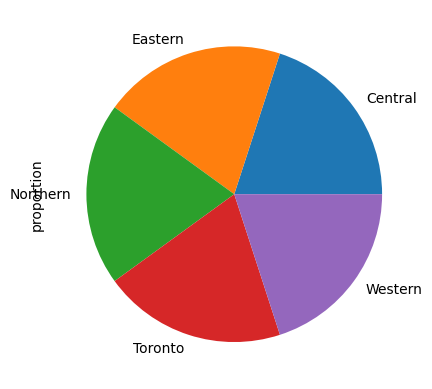

In [47]:
#Pie chart visualization of inmate cases sorted by region (VISUALIZATION1)
plt=all_cases["Region"].value_counts(normalize=True).plot(kind="pie")

The plot above depicts the the number of COVID cases of inmates in Ontario after normalization. As seen, each section within the chart is relatively equal between each region.  

During the creation of the plot, I struggled with the axes placement (as seen with the overlap).

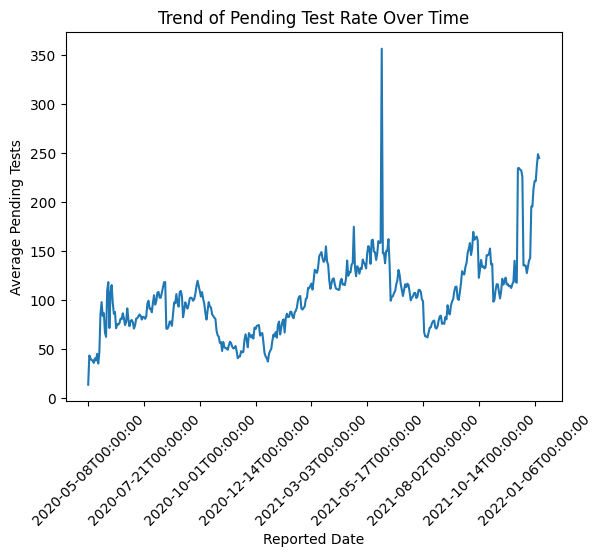

In [48]:
#Line Chart Visualization of the Test Rates over Time (VISUALIZATION2)
import matplotlib.pyplot as plt
all_cases.groupby([all_cases['Reported_Date']])['Total_Number_of_Pending_Tests_on_Reported_Date'].mean().plot()
plt.title("Trend of Pending Test Rate Over Time")
plt.ylabel("Average Pending Tests")
plt.xlabel("Reported Date")
plt.xticks(rotation=45)
plt.show()

The graph above shows the trends of testing rates over time. In the given data above, there is a significant spike correlating to March 3rd, 2021, with a gradual decline following after. The decline afterwards may be attributed to the success of Phase 2 of the COVID-19 vaccine distribution plan, which was carried out on March 5th, 2021.(https://news.ontario.ca/en/release/60568/ontario-ready-to-rollout-phase-two-of-covid-19-vaccine-distribution-plan). 